In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000927628"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000927628
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,CAPITAL ONE FINANCIAL CORP
Ticker,COF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,17.0,3.639118e+01,1.304682e+01,1.813000e+01,2.575000e+01,3.399000e+01,4.697000e+01,6.156000e+01
interest income,66.0,3.766216e+09,1.844227e+09,9.998260e+08,2.413836e+09,3.783500e+09,5.099000e+09,7.092000e+09
net income,66.0,6.774388e+08,5.280849e+08,-1.421546e+09,3.947960e+08,7.236860e+08,1.031000e+09,1.906000e+09
net interest income,66.0,3.108877e+09,1.815317e+09,6.295770e+08,1.440890e+09,3.138000e+09,4.628500e+09,5.820000e+09
provision for loan losses,66.0,9.431671e+08,5.178602e+08,1.702700e+08,5.046242e+08,8.640000e+08,1.278353e+09,2.098921e+09
total revenue,66.0,4.447956e+09,1.641703e+09,1.992900e+09,3.066000e+09,4.033000e+09,5.754500e+09,7.192000e+09


# Plots

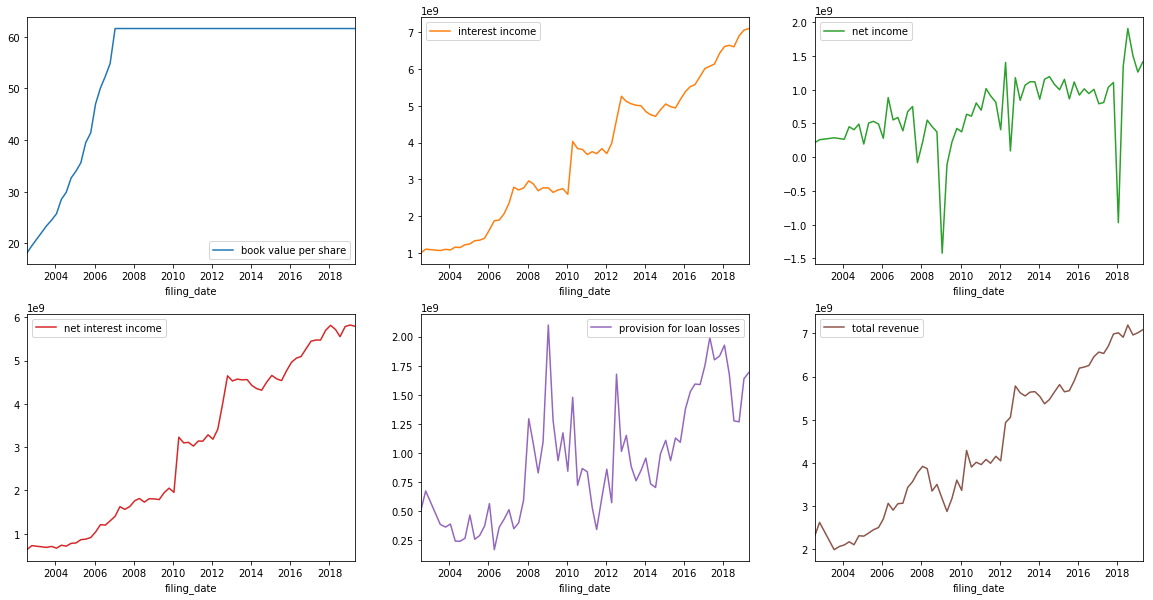

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000927628 book value per share        2002Q4 to 2003Q1: 2 periods  missing   
           book value per share       2007Q1 to 2019Q1: 49 periods  missing   
           interest income             2002Q4 to 2003Q1: 2 periods  missing   
           net income                  2002Q4 to 2003Q1: 2 periods  missing   
           net interest income         2002Q4 to 2003Q1: 2 periods  missing   
           provision for loan losses   2002Q4 to 2003Q1: 2 periods  missing   
           total revenue               2002Q4 to 2003Q1: 2 periods  missing   

                                             message  
cik        item                                       
0000927628 book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()